# Binary Classification using Logistic Regression in Python
This notebook walks through the process of building a logistic regression classification model using synthetic data. The task is to predict whether an individual's income is above or below $70,000 based on their years of experience and level of education.

## What is Logistic Regression?
Logistic regression is a **supervised machine learning algorithm** used for **binary classification**. It estimates the probability that an input belongs to one of two classes.

**Model Equation:**
$$
\text{P}(y = 1) = \frac{1}{1 + e^{-(w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n)}}
$$
- Output is a probability between 0 and 1
- Thresholding the probability (typically at 0.5) yields the final binary class

## Understanding the Sigmoid Function in Logistic Regression

In logistic regression, our goal is to predict **probabilities** — values between 0 and 1 — instead of continuous outputs like in linear regression.

To achieve this, we use a special function called the **sigmoid function**.

---

### What is the Sigmoid Function?

The **sigmoid function** is an S-shaped curve that maps any real-valued number into a number between **0 and 1**.

Its formula is:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where:
- \( z \) is a linear combination of input features:
  \[
  z = w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n
  \]
- \( e \) is **Euler’s number**, approximately **2.718**, the base of the natural logarithm.

---

### Why Use Sigmoid?

The sigmoid function has several important properties:

- It **smoothly squashes** any real number into the (0, 1) interval.

- For large negative $z$, $\sigma(z) \approx 0$
- For $z = 0$, $\sigma(z) = 0.5$
- For large positive $z$, $\sigma(z) \approx 1$

This makes it ideal for **interpreting output as a probability**.

---

### Why Does Logistic Regression Use the Word “Regression”?

Even though logistic regression is used for **classification**, it's called "regression" because it still involves:

- Fitting a **linear combination** of inputs \( z \)
- Learning **coefficients** (weights) like linear regression
- But instead of outputting \( z \), it passes \( z \) through the sigmoid function to produce a **probability**

So it is regression in how it computes \( z \), but classification in how it interprets the result.

---

### What Is \( e \), and Why Is It There?

- \( e \approx 2.718 \) is a mathematical constant called **Euler’s number**.
- It appears naturally in problems involving **growth**, **decay**, and **logarithmic behavior**.
- In the sigmoid function, it ensures a **smooth and differentiable** curve — which is critical for gradient-based learning methods like logistic regression.

---




## Step 1: Generate Synthetic Data
We create 500 synthetic records representing people with different education levels and years of experience. Income is calculated based on base salary, years of experience, and education bonuses. A binary label `HighIncome` is created based on whether the total income is ≥ $70,000.

In [1]:
import numpy as np
import pandas as pd
#  important configuration for proper display of PDs
from IPython.display import display, HTML

# Show all columns
pd.set_option('display.max_columns', None)

# Show all rows
pd.set_option('display.max_rows', None)

# Don't truncate cell content
pd.set_option('display.max_colwidth', None)

# Optional: Use horizontal scrolling for wide tables
display(HTML("<style>.dataframe { width:100% !important; overflow-x: auto; }</style>"))


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

np.random.seed(1)
n_samples = 500
education_levels = ['None', 'Certification', 'Bachelor', 'Master', 'PhD']
education_bonus = {
    'None': 0,
    'Certification': 5000,
    'Bachelor': 10000,
    'Master': 20000,
    'PhD': 30000
}

years_exp = np.random.uniform(0, 30, n_samples)
education = np.random.choice(education_levels, n_samples)
base_salary = 30000
increment_per_year = 2000
noise = np.random.normal(0, 3000, n_samples)
income = base_salary + increment_per_year * years_exp + np.array([education_bonus[ed] for ed in education]) + noise
high_income = (income >= 70000).astype(int)

df = pd.DataFrame({
    'YearsExperience': years_exp,
    'EducationLevel': education,
    'Income': income,
    'HighIncome': high_income
})
df

,YearsExperience,EducationLevel,Income,HighIncome
0,12.510660,None,55252.059486,0
1,21.609735,PhD,105063.330166,1
2,0.003431,Certification,35086.537378,0
3,9.069977,PhD,76033.726100,1
4,4.402677,None,39012.302696,0
5,2.770158,Bachelor,44176.942318,0
6,5.587806,Master,62559.899414,0
7,10.366822,Bachelor,57356.078686,0
8,11.903024,Certification,64192.154268,0
9,16.164502,Master,81084.573577,1


## Step 2: Explore and Visualize the Data
We visualize how income varies with experience and education. The color and shape of the markers represent whether income is above or below $70,000.

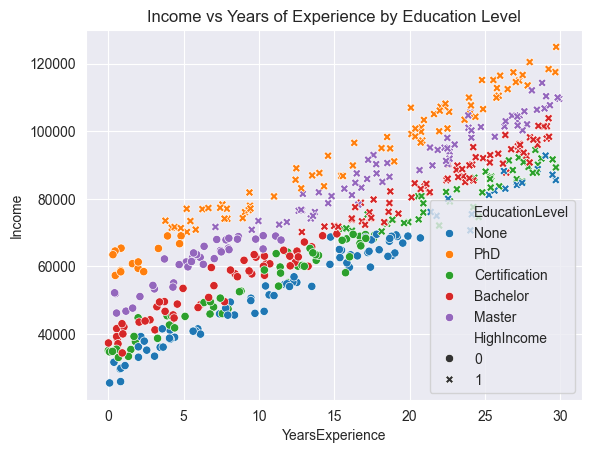

In [68]:
sns.scatterplot(data=df, x='YearsExperience', y='Income', hue='EducationLevel', style='HighIncome')
plt.title('Income vs Years of Experience by Education Level')
plt.grid(True)
plt.show()

### Step 3: One-Hot Encoding and Reference Categories

When preparing categorical data for modeling, we use **one-hot encoding** to convert text categories into numeric binary columns. Our dataset includes a column named `EducationLevel`, which contains categorical values like:

- None
- Certification
- Bachelor
- Master
- PhD

Since machine learning models, including logistic regression, cannot directly process text values, we transform `EducationLevel` into multiple binary columns using:

~~~
pd.get_dummies(df, columns=['EducationLevel'], drop_first=True)
~~~

This command performs **one-hot encoding** and includes the parameter `drop_first=True`. Here's what it means:

---

#### What `drop_first=True` Does

- For a categorical feature with *N* categories, one-hot encoding creates *N − 1* binary columns.
- The **first category alphabetically** (unless otherwise sorted) is **dropped intentionally**.
- This is done to prevent **multicollinearity** — a condition where features are linearly dependent, which can distort models like logistic regression.

---

#### Why "Bachelor" Doesn't Appear

Let’s say the categories in `EducationLevel` are:

- None
- Certification
- Bachelor
- Master
- PhD

If `"Bachelor"` is missing from the encoded columns, it's because it's being used as the **reference category**.

You will see only these four columns in the encoded DataFrame:

- `EducationLevel_Certification`
- `EducationLevel_Master`
- `EducationLevel_PhD`
- `EducationLevel_None`

This means:

- If a row has all `0`s in these columns, it implicitly belongs to `"Bachelor"`.
- Logistic regression will treat `"Bachelor"` as the **baseline**, and other education levels will be interpreted **relative to it** in the model coefficients.

---
#### Summary

- `drop_first=True` drops one category to avoid redundancy.
- The dropped category (e.g., `"Bachelor"`) becomes the **reference**.
- All-zero rows in encoded columns correspond to the reference category.
- This is a standard and recommended approach in linear and logistic regression models.


In [70]:
# One-hot encode the 'EducationLevel' column
df_encoded = pd.get_dummies(df, columns=['EducationLevel'], drop_first=True)

# Show the first few rows of the transformed data
df_encoded


,YearsExperience,Income,HighIncome,EducationLevel_Certification,EducationLevel_Master,EducationLevel_None,EducationLevel_PhD
0,12.510660,55252.059486,0,False,False,True,False
1,21.609735,105063.330166,1,False,False,False,True
2,0.003431,35086.537378,0,True,False,False,False
3,9.069977,76033.726100,1,False,False,False,True
4,4.402677,39012.302696,0,False,False,True,False
5,2.770158,44176.942318,0,False,False,False,False
6,5.587806,62559.899414,0,False,True,False,False
7,10.366822,57356.078686,0,False,False,False,False
8,11.903024,64192.154268,0,True,False,False,False
9,16.164502,81084.573577,1,False,True,False,False



### 2. Train-Test Split

To evaluate model performance accurately, we divide the dataset into two parts:

- **Training set**: typically 80% of the data, used to fit the model.
- **Test set**: the remaining 20%, used to assess model performance on unseen data.

We use scikit-learn’s `train_test_split()` function for this purpose. It randomly partitions the data and allows us to fix the randomness using a `random_state` parameter to ensure reproducibility.

At the end of this step, we will have:
- A feature matrix `X` containing only numeric input features.
- A target vector `y` containing binary classification labels (0 or 1).
- Training and test sets ready for model development.


In [73]:
# Separate features and target, here we will only focus on features
X = df_encoded.drop(['Income', 'HighIncome'], axis=1)
display(X.head(10))
X.shape

,YearsExperience,EducationLevel_Certification,EducationLevel_Master,EducationLevel_None,EducationLevel_PhD
0,12.510660,False,False,True,False
1,21.609735,False,False,False,True
2,0.003431,True,False,False,False
3,9.069977,False,False,False,True
4,4.402677,False,False,True,False
5,2.770158,False,False,False,False
6,5.587806,False,True,False,False
7,10.366822,False,False,False,False
8,11.903024,True,False,False,False
9,16.164502,False,True,False,False


(500, 5)

In [76]:
y = df_encoded['HighIncome']
display(y.head(10).to_frame()) # this is a vector!

,HighIncome
0,0
1,1
2,0
3,1
4,0
5,0
6,0
7,0
8,0
9,1


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Capital letters typically denote matrices: X
# Lowercase letters denote vectors or scalars: y

# Show the shape of each split
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (400, 5)
Test set: (100, 5)


## Step 4: Train the Logistic Regression Model
We train the logistic regression model using scikit-learn's `LogisticRegression` class.

In [83]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Step 5: Make Predictions and Inspect Results
After training the model, we predict outcomes on the test set and examine a few predicted vs actual values.

In [86]:
y_pred = model.predict(X_test)
results = X_test.copy()
results['Actual'] = y_test.values
results['Predicted'] = y_pred
results.head(15)

,YearsExperience,EducationLevel_Certification,EducationLevel_Master,EducationLevel_None,EducationLevel_PhD,Actual,Predicted
361,4.290175,False,True,False,False,0,0
73,24.221739,True,False,False,False,1,1
374,0.911991,False,False,False,False,0,0
155,22.314776,False,True,False,False,1,1
104,27.256055,False,False,False,False,1,1
394,17.802973,False,True,False,False,1,1
377,20.780332,True,False,False,False,1,1
124,25.800838,False,False,False,True,1,1
68,28.337843,True,False,False,False,1,1
450,5.628950,False,False,True,False,0,0


## Step 6: Evaluate Model Performance
We evaluate the model using accuracy, confusion matrix, precision, recall, and F1-score. These metrics help us understand how well the model distinguishes high-income from low-income individuals.

---

### 1. Accuracy

**Definition:**
$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Predictions}} = \frac{TP + TN}{TP + TN + FP + FN}
$$
From the confusion matrix:

- True Positives (TP) = 56
- True Negatives (TN) = 39
- False Positives (FP) = 2
- False Negatives (FN) = 3

$$
\text{Accuracy} = \frac{56 + 39}{100} = 0.95 \text{ or } 95\%
$$

The model correctly predicted 95% of the cases.

---

In [87]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.95



### 2. Confusion Matrix

$$
\begin{bmatrix}
\text{TN} & \text{FP} \\\\
\text{FN} & \text{TP}
\end{bmatrix}
=
\begin{bmatrix}
39 & 2 \\\\
3 & 56
\end{bmatrix}
$$

- **TN (True Negative)**: 39 → Model correctly predicted class `0`
- **FP (False Positive)**: 2 → Model incorrectly predicted `1` instead of `0`
- **FN (False Negative)**: 3 → Model incorrectly predicted `0` instead of `1`
- **TP (True Positive)**: 56 → Model correctly predicted class `1`

---

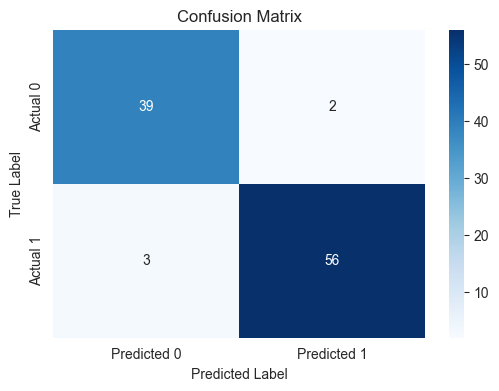

In [93]:
cm = confusion_matrix(y_test, y_pred)
labels = ["Actual 0", "Actual 1"]

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Predicted 0", "Predicted 1"], yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### 3. Classification Report

The report gives **class-wise metrics**:

| Metric     | Definition                                                                 |
|------------|---------------------------------------------------------------------------|
| Precision  | \( \frac{TP}{TP + FP} \): Of all predicted positives, how many are correct |
| Recall     | \( \frac{TP}{TP + FN} \): Of all actual positives, how many did we find?   |
| F1-score   | Harmonic mean of precision and recall: balances both                       |
| Support    | Actual number of instances of each class in the test set                   |

Example:
- For class `1`:
  - Precision = 0.97
  - Recall = 0.95
  - F1-score = 0.96
  - Support = 59 samples

---

##### For Class `1` (positive class):

- **Precision = 0.97**:
  Of all samples the model predicted as class 1, **97% were correct** (very few false positives).
- **Recall = 0.95**:
  Of all actual class 1 samples, **95% were correctly identified** (a few false negatives exist).
- **F1-score = 0.96**:
  A strong balanced measure indicating excellent performance overall.
- **Support = 59**:
  The model was evaluated on 59 true samples of class 1.

---

### Why These Metrics Matter (From a Data Science Perspective)

- **Accuracy alone can be misleading**, especially when classes are imbalanced (e.g., 95% class 0, 5% class 1). A model that always predicts class 0 would have high accuracy but be useless.

- **Precision is critical** when the cost of false positives is high
  (e.g., predicting someone has cancer when they don’t → unnecessary anxiety and tests).

- **Recall is critical** when missing positives is dangerous
  (e.g., failing to detect a fraudulent transaction).

- **F1-score** helps when you want a **balanced view** and the dataset is imbalanced or when both precision and recall are equally important.

- **Support** gives context to each score: a high F1-score for a class with very low support is **less reliable**.

---

In summary, the classification report offers a **deeper and fairer view** of model performance, enabling data scientists to align model behavior with the **business context**, **risk factors**, and **application needs**.





In [95]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        41
           1       0.97      0.95      0.96        59

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100

